# 1. Introduction

My main goal is to gain insights to educational equality in Chicago. To achieve that, I would like to see the student demographic and performance by location.
I am hoping to learn if the school's location and student body affect the schools' college enrollmen rate. My hypothesis is that the school's performance (measured by college enrollment rate) is affected by the schools's student body, but I am unsure if there's relationship between the schools's college enrollment rate and their address or if there's correlation between the location and the student body. By the amount of columns the dataset has, I assumed that it needed a lot of cleaning and filtering before analysis.

# 2. Data Explained

The dataset I am using is from the government website Chicago Data Portal. The dataset contains school profile information for all schools in the Chicago Public School district for the school year 2023-2024. The dataset was last updated on September 2023, so it's fairly new. There are 99 columns and 652 rows in total.
    
There are a lot of issues with this dataset, mainly the amount of NA values and non-applicable values. For example, some of the variables have as little as only four non-null values. Even for the non-null values, some are not helpful. For example, the 'Overall_Rating' variable only containes the statement on why there is no rating for the school due to covid.'

Since the rating is not available so I have decided to use College Enrollment Rate as the dependent variable for my data, which means that I only keep the high school data.
    
Data Source: https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Profile-Information-/cu4u-b4d9

In [12]:
import pandas as pd
schools = pd.read_csv("Chicago_Public_Schools_-_School_Profile_Information_SY2324_20231015.csv")
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 99 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   School_ID                                652 non-null    int64  
 1   Legacy_Unit_ID                           652 non-null    int64  
 2   Finance_ID                               652 non-null    int64  
 3   Short_Name                               652 non-null    object 
 4   Long_Name                                652 non-null    object 
 5   Primary_Category                         652 non-null    object 
 6   Is_High_School                           652 non-null    bool   
 7   Is_Middle_School                         652 non-null    bool   
 8   Is_Elementary_School                     652 non-null    bool   
 9   Is_Pre_School                            652 non-null    bool   
 10  Summary                                  650 non-n

### Steps To Clean The Data
1. I combined all minority student counts into one variable named "minority".
2. I turned all the different student counts into percentages.
3. I filtered out the schools without a college enrollment rate.
4. I selected all the columns I needed and created a new dataframe named "Cleaned_schools" and removed the NA values.
5. I also looked at the boxplots of Ethnic_Minority_Percentage, Low_Income_Percentage, Special_Ed_Percentage, English_Learners_Percentage, College_Enrollment_Rate_School, and decided to drop the schools that have extremely high percentage of special ed students because those could suggest that the schools is special ed.

In [ ]:
# the code for it
minority = schools_new.iloc[:,[34,35,37,38,39,40,41,42]]
schools_new['Student_Count_Ethnic_Minority'] = minority.sum(axis = 1).values
schools_new['Ethnic_Minority_Percentage'] = schools_new.loc[:,'Student_Count_Ethnic_Minority']/schools_new.loc[:,'Student_Count_Total']
schools_new['Low_Income_Percentage'] = schools_new['Student_Count_Low_Income']/schools_new['Student_Count_Total'].values
schools_new['Special_Ed_Percentage'] = schools_new['Student_Count_Special_Ed']/schools_new['Student_Count_Total'].values
schools_new['English_Learners_Percentage'] = schools_new['Student_Count_English_Learners']/schools_new['Student_Count_Total'].values

cleaned_schools = schools_new[['School_ID','Zip','Ethnic_Minority_Percentage',
                              'Low_Income_Percentage','Special_Ed_Percentage',
                              'English_Learners_Percentage','College_Enrollment_Rate_School']]
cleaned_schools = cleaned_schools.dropna()

q1 = np.percentile(cleaned_schools['Special_Ed_Percentage'], 25)
q3 = np.percentile(cleaned_schools['Special_Ed_Percentage'], 75)
# print(q1, q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
cleaned_schools = cleaned_schools[cleaned_schools['Special_Ed_Percentage']<=upr_bound]

In [17]:
cleaned_schools = pd.read_csv("Cleaned_schools.csv")
cleaned_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      156 non-null    int64  
 1   School_ID                       156 non-null    int64  
 2   Zip                             156 non-null    int64  
 3   Ethnic_Minority_Percentage      156 non-null    float64
 4   Low_Income_Percentage           156 non-null    float64
 5   Special_Ed_Percentage           156 non-null    float64
 6   English_Learners_Percentage     156 non-null    float64
 7   College_Enrollment_Rate_School  156 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 9.9 KB


 Unnamed: 0 : The attribute's row number in the original dataset. Kept because might be useful.
 
 School_ID
 
 Zip
 
 Ethnic_Minority_Percentage: The percentage of ethnic minority students in the school
 
 Low_Income_Percentage: The percentage of low income students in the school
 
 Special_Ed_Percentage: The percentage of special ed students in the school
 
 English_Learners_Percentage: The percentage of English learners in the school
 
 College_Enrollment_Rate_School: The college enrollment rate of the school

# 3. Results

In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

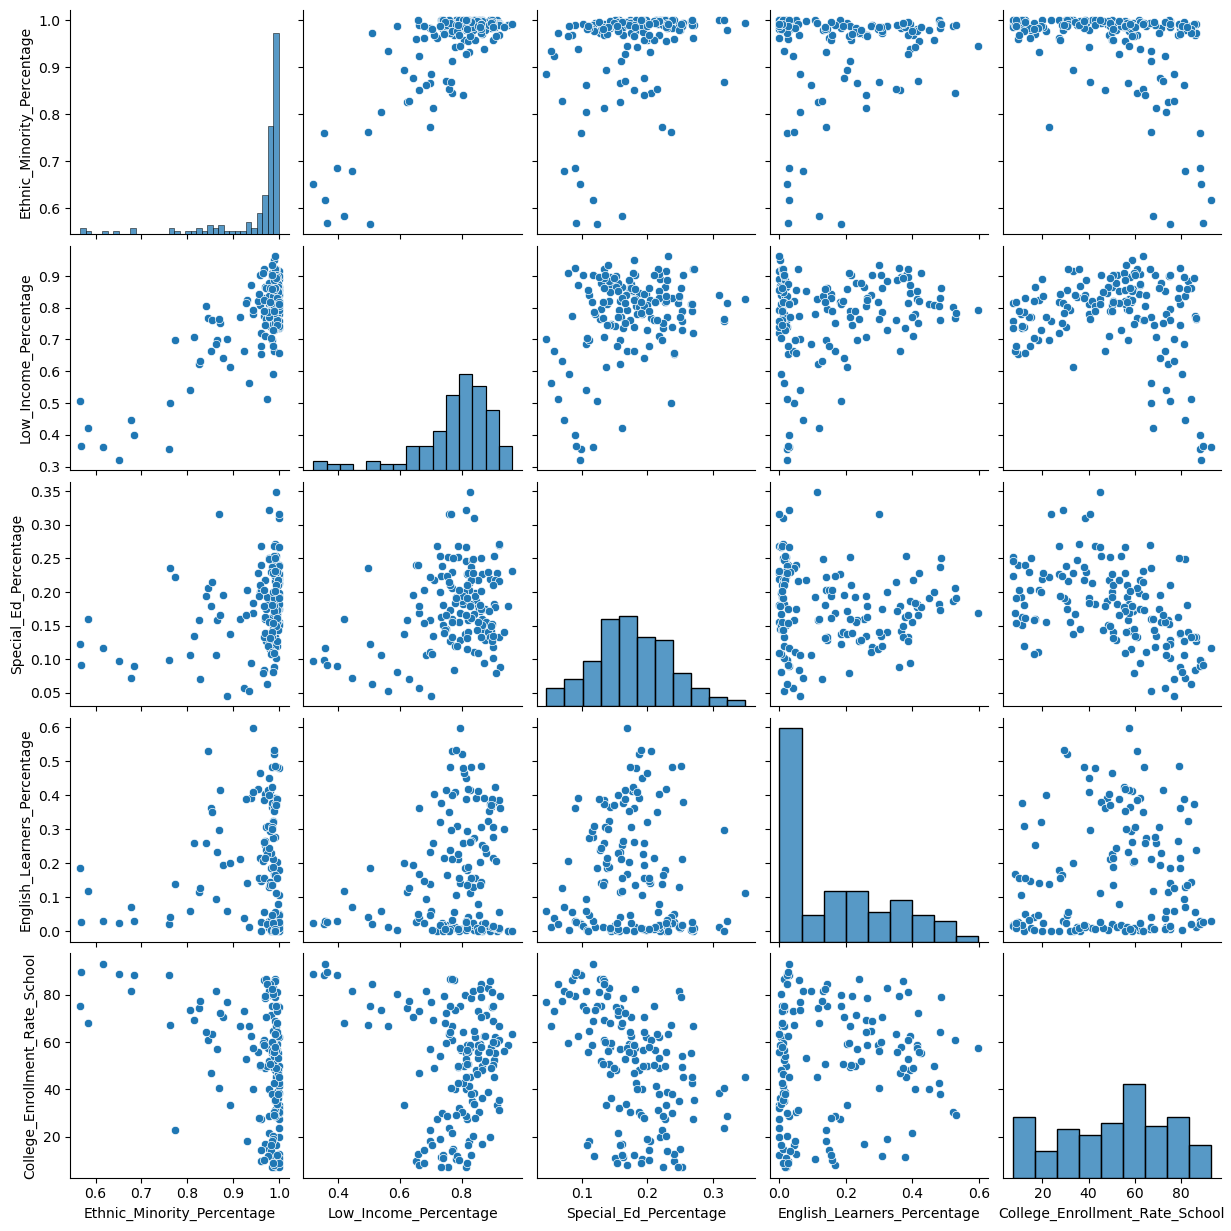

In [20]:
columns = ['Ethnic_Minority_Percentage','Low_Income_Percentage','Special_Ed_Percentage',
          'English_Learners_Percentage','College_Enrollment_Rate_School']
sns.pairplot(cleaned_schools[columns])

The scatter plots show linearity between some of our independent variables. For example, low income percentage and ethnic minority percentage. However, the relationship between college enrollment rate and other variables are less clear.

<Axes: ylabel='Count'>

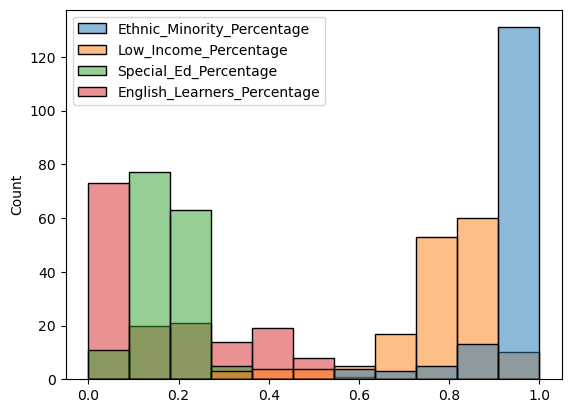

In [23]:
columns = ['Ethnic_Minority_Percentage','Low_Income_Percentage','Special_Ed_Percentage',
          'English_Learners_Percentage']
sns.histplot(data = cleaned_schools[columns])

The histograms of show that ethnic minority percentage, low income percentage, and special ed percentage skew to the right, meaning that many schools in our dataset have high percentage of ethnic minority and epcial ed students. The English learner percentage skew to the left, meaning that most schools do not have a high percentage of English learners. The College enrollment rates are relatively uniform distribution rate.
These observations make sense because the dataset only has public school data, and low income students tend to go to public schools.

,Zip,Ethnic_Minority_Percentage,Low_Income_Percentage,Special_Ed_Percentage,English_Learners_Percentage,College_Enrollment_Rate_School
Zip,1.000000,0.049241,0.040338,-0.091953,0.037370,0.031899
Ethnic_Minority_Percentage,0.049241,1.000000,0.785570,0.295072,0.014173,-0.373652
Low_Income_Percentage,0.040338,0.785570,1.000000,0.306780,0.200500,-0.186769
Special_Ed_Percentage,-0.091953,0.295072,0.306780,1.000000,-0.066248,-0.469917
English_Learners_Percentage,0.037370,0.014173,0.200500,-0.066248,1.000000,0.098049
College_Enrollment_Rate_School,0.031899,-0.373652,-0.186769,-0.469917,0.098049,1.000000


<Axes: >

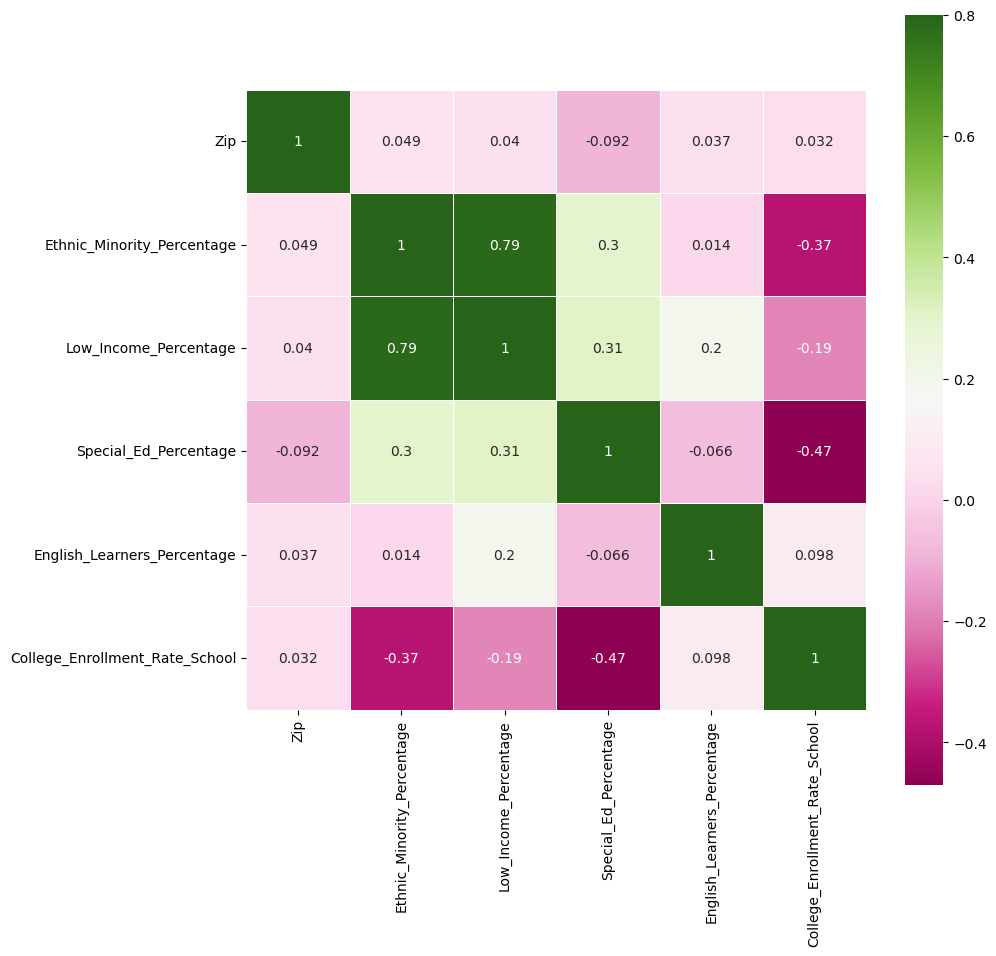

In [24]:
df_corr = cleaned_schools.loc[:,'Zip':'College_Enrollment_Rate_School']

# creates a correlation matrix
corrmat = df_corr.corr()
corrmat

# heatmap of correlation matrix
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, cmap = 'PiYG', linewidths = .5 )

From the correlation heat map, ethnic monority percentage, low income percentage and special ed percentage all have a negative correlation with college enrollment rate, meaning that an increase in these percentages corresponds to a decrease in collge enrollment rate.
Zip and English learners percentage as a slight positive correlation with college enrollment rate, meaning that an increase in these corresponds to an increase in college enrollment rate. However, since zip is categorical, the correlation might be a coincidence and we need further analysis for it.
The map also shows that there's a strong positive correlation between low income percentage and ethnic minority percentage.

In [25]:
grouped = cleaned_schools.groupby('Zip', as_index=False)
grouped_mean = grouped.mean()
grouped_mean.sort_values(['College_Enrollment_Rate_School'], ascending = False).head()
grouped_mean.sort_values(['College_Enrollment_Rate_School']).head()

,Zip,Unnamed: 0,School_ID,Ethnic_Minority_Percentage,Low_Income_Percentage,Special_Ed_Percentage,English_Learners_Percentage,College_Enrollment_Rate_School
2,60607,257.00,609755.0,0.759243,0.354824,0.098738,0.022543,88.300
1,60605,208.00,609678.0,0.684318,0.398167,0.090122,0.030041,88.300
5,60610,222.00,504925.0,0.816760,0.566664,0.117511,0.104995,84.250
8,60614,106.00,609738.0,0.677958,0.446565,0.072519,0.070611,81.800
32,60642,337.75,452672.0,0.943289,0.756485,0.133452,0.203982,81.625


,Zip,Unnamed: 0,School_ID,Ethnic_Minority_Percentage,Low_Income_Percentage,Special_Ed_Percentage,English_Learners_Percentage,College_Enrollment_Rate_School
38,60651,348.333333,400108.666667,0.989810,0.762118,0.205232,0.093579,25.166667
34,60644,277.750000,557782.500000,0.994856,0.805580,0.216060,0.010428,28.350000
10,60616,322.000000,442022.800000,0.988975,0.792345,0.239241,0.015433,34.320000
3,60608,402.571429,460009.285714,0.987006,0.827837,0.175723,0.273281,37.285714
33,60643,479.500000,504916.750000,0.988784,0.770315,0.171846,0.006536,38.200000


After some research, it turned out the the top five zip codes with the highest college enrollment rates are in the downtown and north area of Chicago.And the bottom five zip codes with the lowest college enrollment rates are mainly from the west side and the south Chicago area. From the top five and bottom five rows we can also observe that the zip codes with lowest college enrollment rate also have higher percentage of ethnic minorities, low income, and special ed students.

In [27]:
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
import pgeocode
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
pandas_bokeh.output_notebook()
import plotly.graph_objects as go

nomi = pgeocode.Nominatim('us')

edf = grouped_mean
edf['Latitude'] = (nomi.query_postal_code(edf['Zip'].astype('str').tolist()).latitude)
edf['Longitude'] = (nomi.query_postal_code(edf['Zip'].astype('str').tolist()).longitude)

fig = go.Figure(data=go.Scattergeo(
        lon = edf['Longitude'],
        lat = edf['Latitude'],
        text = edf['College_Enrollment_Rate_School'],
        mode = 'markers',
        marker_color = edf['College_Enrollment_Rate_School'],
        ))

fig.update_layout(
        title = 'College Enrollment Rate by Zip',
        geo_scope='usa',
    )
fig.show()

Loading BokehJS ...

On the map, each dot represents a zip code and the ligher the color of the dot, the better the average college enrollment rate in that zip code. We can see that most of the light yellow and orange dots, representing the schools with higher college enrollment rate, are concentarted around the coastal area of North Chicago. 
It is also interesting that the west side of South Chicago seems to be doing a bit better than the other parts in South Chicago. And the two schools with lowest college enrollment rates are actually located in North Chicago. 

# 4. Summary
* In this project we tried to analyze the relationship between student demographics, the location of the school, and the student performance(measured by college enrollment rate). My hypothesis was that the school's college enrollment rate is affected by the schools's student demographic, but I was unsure if there's relationship between the schools's college enrollment rate and their address or if there's correlation between the location and the student body. I created a new data file with the cleaned and transformed data, then used visualization such as boxplot, scatterplot,and correlation to analyze.

* There are some difficulties with the data due to the lack of useful information in the data such as overall rating. Also I had problem analyzing the geographical relationship without using visualization because I am not familiar with the methods. Also there's limitation of the data because college enrollment rate does not necessarily equate to student performance since there are many other factors that decide if a student is pursuing higher education or not. Also using college enrollment rate as the metric make the data less inclusive.

* The conclusion is that there's seems to be a relationship between student demographics and the high school's college enrollment rate, and a relationship can also be observed between the geographical location of the school and the college enrollment rate.

* The research can be further developed if we have data of the overall rating, then we can include kindergartens, elementary schools, and junior highs into consideration. It would also be great if we can categorize the zip codes then use it in correlation analysis. 